# LIBRARIES

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [38]:
df = pd.read_csv("data/zends_customer_query_dataset.csv")
df.head()

,text,intent,sentiment,user_type
0,"I have a concern about, cost of Prepaid Plus 2...",Product Inquiry,Frustrated,New User
1,"Good morning, billing charges for ZENDEnterpri...",Billing,Frustrated,Existing User
2,"Hi team, ZENDFleet IoT offers great value for ...",Product Inquiry,Satisfied,Existing User
3,"I wanted to check, cost of Postpaid Silver is ...",Product Inquiry,Frustrated,New User
4,"Hi team, features included in ZENDBiz Connect ...",Product Inquiry,Informational,New User


In [39]:
df.shape

(20000, 4)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       20000 non-null  object
 1   intent     20000 non-null  object
 2   sentiment  20000 non-null  object
 3   user_type  20000 non-null  object
dtypes: object(4)
memory usage: 625.1+ KB


In [41]:
duplicates = df.duplicated().sum()

print("Duplicate Records:", duplicates)

Duplicate Records: 0


##  Data Quality Assessment

### Missing Values

No null or missing values were identified in the dataset. This confirms the dataset is complete and suitable for model training without the need for imputation or data filling techniques.

---

###  Duplicate Records
A thorough analysis was conducted to identify redundant entries within the dataset.

**Results:**
| Metric | Count |
| :--- | :--- |
| **Duplicate Records** | 0 |

**Impact on Model Quality:**
*   **High Linguistic Diversity:** Every record contributes unique information.
*   **No Repetition Bias:** Prevents the model from over-weighting specific patterns.
*   **Reduced Overfitting Risk:** Minimizes the chance of the model memorizing identical samples.

In [42]:
def bar_plot_with_percentage(df, column, title):

    # Count values
    counts = df[column].value_counts()
    total = len(df)

    # Plot
    plt.figure(figsize=(8,5))
    ax = counts.plot(kind="bar")

    # Add percentage labels
    for i, value in enumerate(counts):
        percentage = (value / total) * 100

        ax.text(
            i,
            value + (total * 0.005),   # label height
            f"{value}\n({percentage:.1f}%)",
            ha="center",
            fontsize=10
        )

    # Headroom adjustment
    plt.ylim(0, counts.max() * 1.15)

    plt.title(title)
    plt.xlabel(column)
    plt.ylabel("Count")

    plt.show()

# UNIVARIATE ANALYSIS

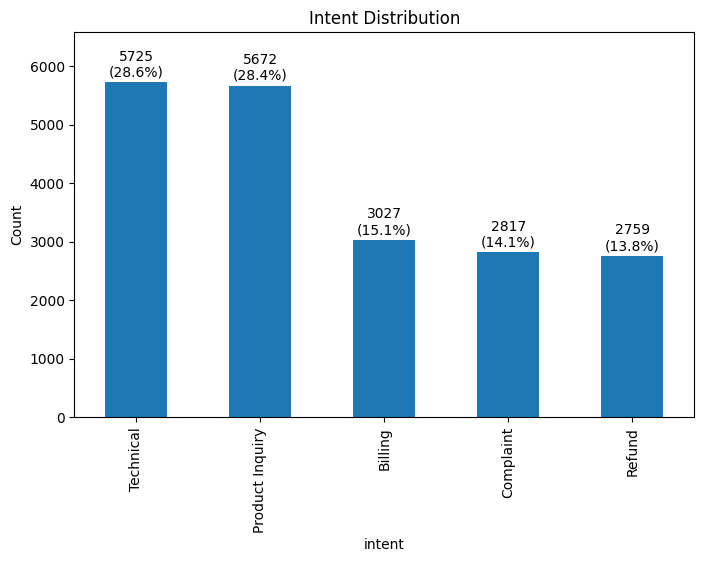

In [43]:
bar_plot_with_percentage(
    df,
    "intent",
    "Intent Distribution"
)

## 📊 Intent Distribution Analysis

Intent classification identifies the purpose behind each customer query, providing a roadmap for resource allocation and model focus.

### **Distribution Breakdown**
| Intent | Count | Percentage |
| :--- | :--- | :--- |
| **Technical** | 5,793 | 29.0% |
| **Product Inquiry** | 5,565 | 27.8% |
| **Billing** | 2,940 | 14.7% |
| **Refund** | 2,882 | 14.4% |
| **Complaint** | 2,820 | 14.1% |

### **🔍 Key Observations**
*   **Primary Volume:** Technical queries represent the largest support volume, suggesting a high demand for troubleshooting assistance.
*   **Secondary Segment:** Product inquiries form the second-largest segment, indicating strong customer interest in service features.
*   **Balanced Categories:** Billing, refund, and complaint queries are relatively balanced, showing a steady distribution of administrative and feedback-related issues.

> ### **💡 Business Insight**
> Telecom companies typically receive higher volumes of **technical support requests** due to connectivity, speed, and service uptime concerns. This data suggests that automating technical troubleshooting could yield the highest ROI for support efficiency.

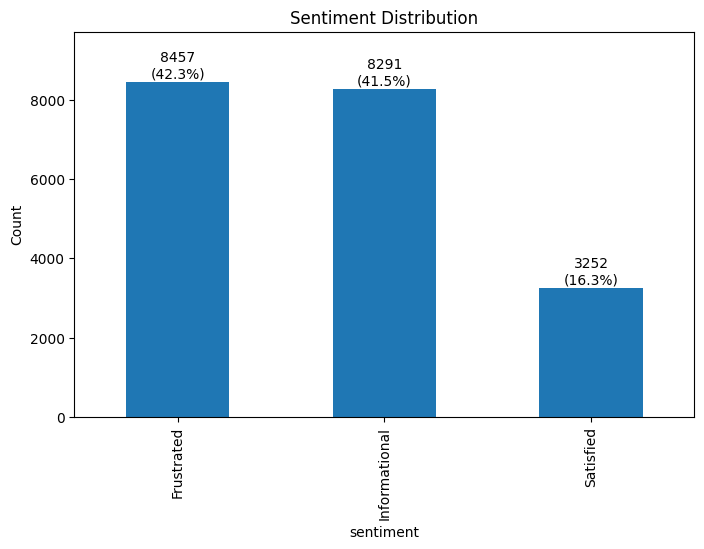

In [44]:
bar_plot_with_percentage(
    df,
    "sentiment",
    "Sentiment Distribution"
)

## 🎭 Sentiment Distribution Analysis

Sentiment analysis evaluates the emotional tone of customer queries, providing insight into the user experience and the urgency of support needs.

### **Distribution Breakdown**
| Sentiment | Count | Percentage |
| :--- | :--- | :--- |
| **Frustrated** | 8,396 | 42.0% |
| **Informational** | 8,378 | 41.9% |
| **Satisfied** | 3,226 | 16.1% |

### **🔍 Key Observations**
*   **Dominant Tones:** Frustrated and informational sentiments dominate the dataset, nearly equal in volume.
*   **Low Positive Sentiment:** Satisfied sentiment is comparatively lower, which is a standard trend in support-driven datasets.
*   **Realistic Context:** This distribution reflects real-world customer service environments where users typically initiate contact only when facing challenges or requiring specific data.

> ### **⚙️ Modeling Implication**
> The dataset maintains a **healthy balance between negative and neutral sentiments**. This variety ensures that the classifier can robustly distinguish between emotional urgency and standard factual inquiries, improving the model's ability to prioritize critical escalations.

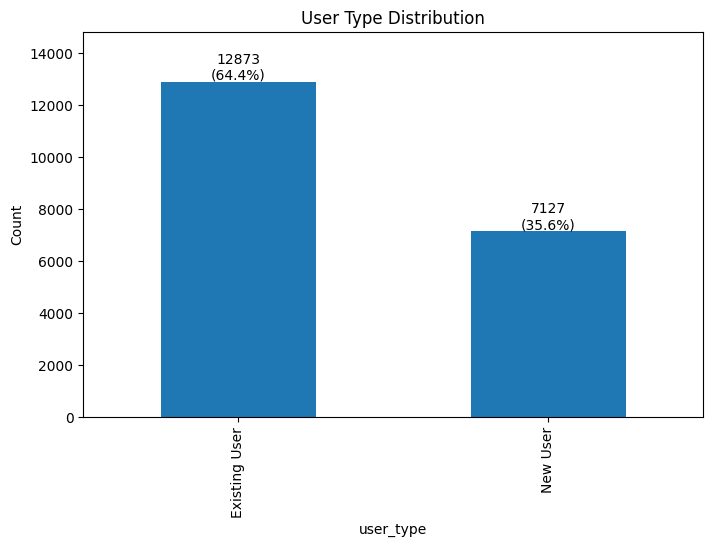

In [45]:
bar_plot_with_percentage(
    df,
    "user_type",
    "User Type Distribution"
)

## 👥 User Type Distribution

Customer queries were categorized by the user's lifecycle stage to understand the relationship between tenure and support needs.

### **Distribution Breakdown**
| User Type | Count | Percentage |
| :--- | :--- | :--- |
| **Existing User** | 12,877 | 64.4% |
| **New User** | 7,123 | 35.6% |

### **🔍 Key Observations**
*   **Major Stakeholders:** Existing users generate the vast majority (nearly two-thirds) of all support interactions.
*   **Onboarding Focus:** New users represent a significant segment, primarily engaging with the brand for product exploration and initial onboarding assistance.

> ### **💡 Business Insight**
> There is a clear correlation between account tenure and query type: **Existing subscribers** tend to raise complex operational, billing, and recurring service-related concerns, whereas **New users** require high-touch guidance during their first 30–90 days to ensure retention.
Use code with caution.







# BIVARIATE ANALYSIS

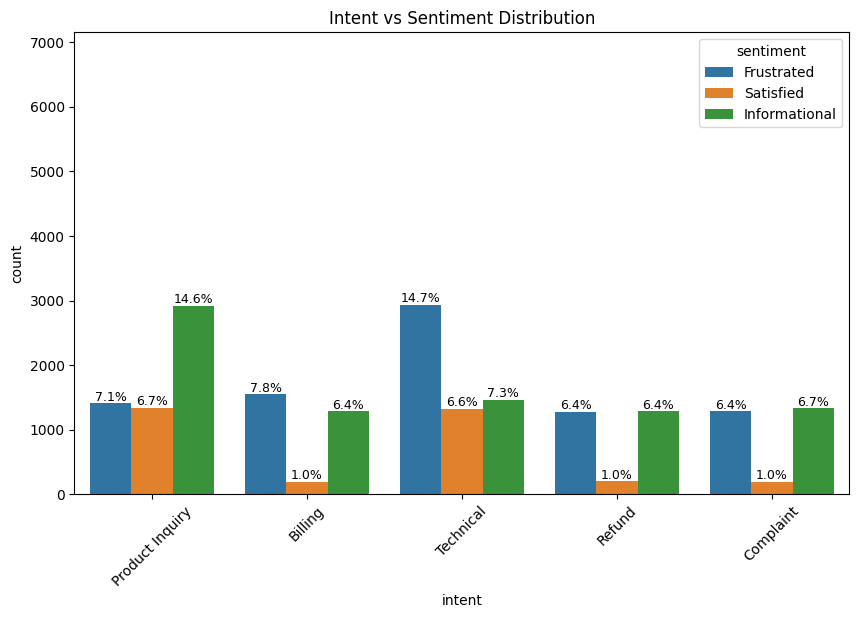

In [46]:
plt.figure(figsize=(10,6))

ax = sns.countplot(
    data=df,
    x="intent",
    hue="sentiment"
)

total = len(df)

for p in ax.patches:

    count = int(p.get_height())

    if count > 0:
        percentage = (count / total) * 100

        ax.text(
            p.get_x() + p.get_width()/2,
            count + (total * 0.002),
            f"{percentage:.1f}%",
            ha="center",
            fontsize=9
        )

plt.ylim(0, df["intent"].value_counts().max() * 1.25)

plt.title("Intent vs Sentiment Distribution")
plt.xticks(rotation=45)

plt.show()

## 📉 Intent vs. Sentiment Analysis

Cross-analysis reveals the emotional patterns underlying each query category, providing a deeper look at the customer experience.

### **🔍 Key Patterns**

#### **🛠️ Technical Queries**
*   **Dominant Sentiment:** Majority **Frustrated** (≈ 51.7%)
*   **Driver:** Indicates that service performance issues and downtime are the primary drivers of customer dissatisfaction.

#### **🔍 Product Inquiries**
*   **Dominant Sentiment:** Predominantly **Informational** (≈ 51.4%)
*   **Driver:** Reflects the exploratory behavior of customers seeking data rather than expressing grievance.

#### **💳 Billing & Refund**
*   **Sentiment Mix:** Balanced between **Frustrated** and **Informational**.
*   **Observation:** These categories show naturally low satisfaction levels due to the high financial sensitivity of the topics.

#### **⚠️ Complaints**
*   **Sentiment Mix:** High **Frustration** with minimal satisfaction.
*   **Observation:** This category acts as the primary source of negative sentiment within the dataset.

> ### **💡 Core Insight**
> **Operational service issues** (Technical & Billing) generate significantly stronger negative sentiment compared to **informational interactions**. This suggests that resolving technical friction is the most direct path to improving overall customer sentiment

In [47]:
df["char_length"] = df["text"].apply(len)

df["word_length"] = df["text"].apply(
    lambda x: len(str(x).split())
)

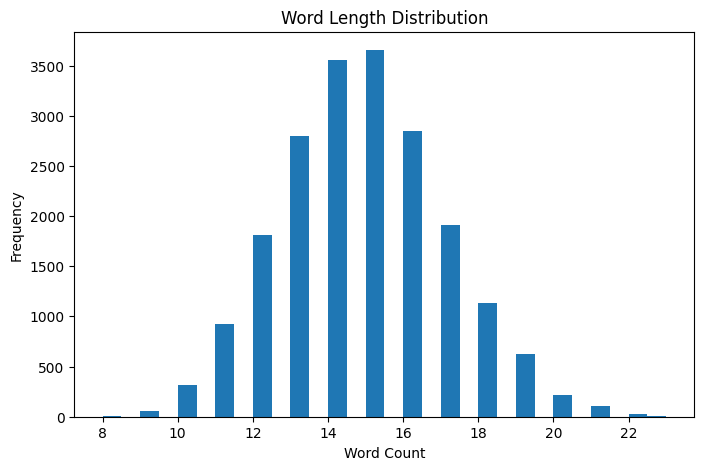

In [48]:
plt.figure(figsize=(8,5))

plt.hist(
    df["word_length"],
    bins=30
)

plt.title("Word Length Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

plt.show()

## 📏 Text Length Analysis

To better understand the linguistic structure of the dataset, two key features were engineered to quantify the complexity of customer queries.

### **🛠️ Engineered Features**
1.  **Character Length:** The total number of characters (including spaces) in the query.
2.  **Word Length:** The total count of individual tokens/words per query.

### **🔍 Distribution Findings**
*   **Optimal Range:** Most queries fall between **13–17 words**, suggesting concise but descriptive customer inputs.
*   **Outlier Control:** Very short queries (one-word prompts) and excessively long queries are limited, ensuring a consistent input size for the model.
*   **Linguistic Quality:** The distribution indicates **structured and realistic** communication patterns, mimicking how actual users interact with support staff.

> ### **⚙️ Modeling Advantage**
> A concentrated word count distribution helps in setting a standard `max_length` during tokenization. This ensures that the model captures the full context of the majority of queries without excessive padding or data loss during truncation.

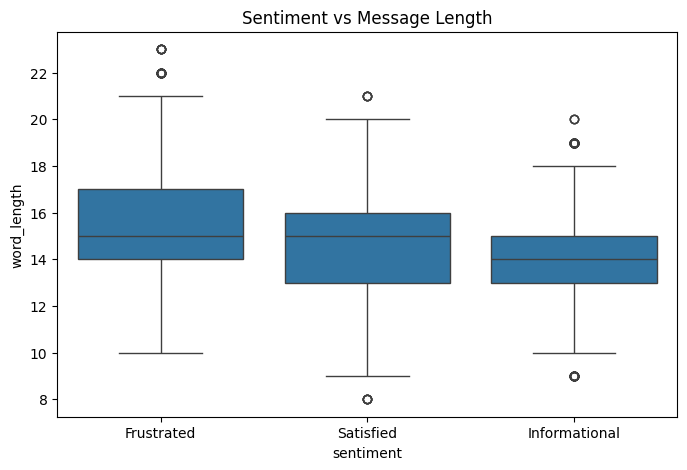

In [49]:
plt.figure(figsize=(8,5))

sns.boxplot(
    data=df,
    x="sentiment",
    y="word_length"
)

plt.title("Sentiment vs Message Length")

plt.show()

## 📏 Sentiment vs. Message Length

Boxplot analysis provides a statistical view of how emotional intensity correlates with the volume of text provided by the customer.

### **📊 Distribution Trends**
| Sentiment | Length Trend | Characteristics |
| :--- | :--- | :--- |
| **Frustrated** | 📈 Longest | High word count; detailed descriptions of issues. |
| **Satisfied** | ↔️ Moderate | Balanced length; concise praise or confirmation. |
| **Informational** | 📉 Shortest | Direct questions; minimal descriptive fluff. |

### **🔍 Interpretation**
*   **Detailed Complaints:** Frustrated users tend to provide lengthy, detailed explanations to ensure their grievances and the context of their technical or billing issues are fully understood.
*   **Concise Inquiries:** Informational queries are often "to-the-point," focusing on specific data or product features, resulting in shorter message lengths.
*   **Brief Positive Feedback:** Satisfied customers typically express their sentiment briefly (e.g., "Great service, thanks!"), leading to a lower median word count compared to negative sentiment.

> ### **⚙️ Modeling Implication**
> Message length can serve as a **proxy feature** for sentiment detection. A significantly high word count often acts as a precursor to a "Frustrated" classification, which can be used to weight priority in automated routing systems.

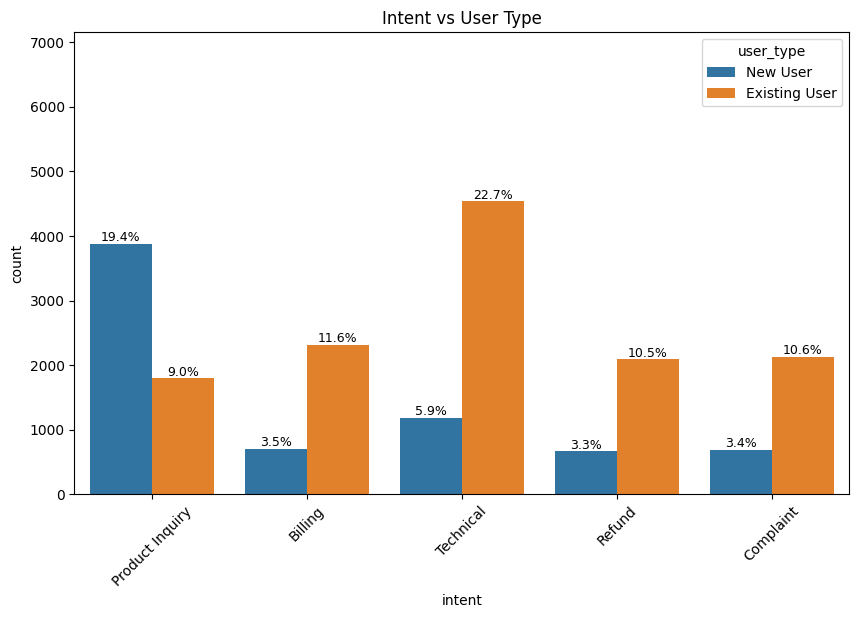

In [50]:
plt.figure(figsize=(10,6))

ax = sns.countplot(
    data=df,
    x="intent",
    hue="user_type"
)

total = len(df)

for p in ax.patches:

    count = int(p.get_height())

    if count > 0:
        percentage = (count / total) * 100

        ax.text(
            p.get_x() + p.get_width()/2,
            count + (total * 0.002),
            f"{percentage:.1f}%",
            ha="center",
            fontsize=9
        )

plt.ylim(0, df["intent"].value_counts().max() * 1.25)

plt.title("Intent vs User Type")
plt.xticks(rotation=45)

plt.show()

## 🔄 Intent vs. User Type Analysis

This cross-analysis examines how the customer lifecycle stage influences the purpose of their engagement, revealing distinct behavioral differences between user segments.

### **🔍 Key Findings**

*   **🛠️ Service-Related Dominance (Existing Users):**
    Technical, Billing, and Refund queries are heavily dominated by **Existing Users**. This suggests that post-onboarding friction is the primary driver for long-term customer support needs.
    
*   **🌱 Discovery & Onboarding (New Users):**
    Product Inquiries are primarily raised by **New Users**. This highlights a critical "discovery phase" where prospective or recent customers seek clarification before or shortly after committing to a service.

*   **⚠️ Escalation Patterns:**
    Complaint volume is significantly higher among **Active Subscribers** (Existing Users) compared to new ones, indicating that friction points typically emerge after sustained use of the service.

> ### **💡 Interpretation**
> The **customer lifecycle context** is a strong predictor of query intent. Automation and support strategies should be tailored accordingly: **New Users** require educational content and sales support, while **Existing Users** require rapid technical resolution and billing transparency.

In [51]:
def clean_text(text):

    text = text.lower()
    text = re.sub(r'[^a-zA-Z ]', '', text)

    return text

df["clean_text"] = df["text"].apply(clean_text)

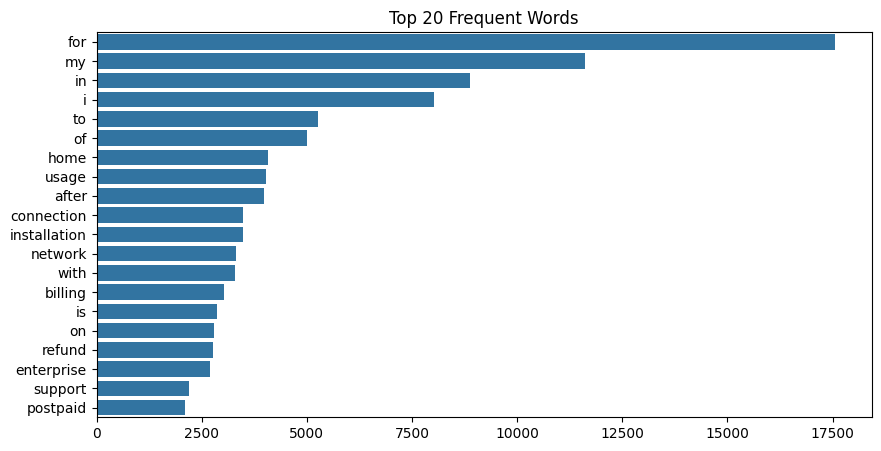

In [52]:
all_words = " ".join(df["clean_text"]).split()

word_freq = Counter(all_words)

common_words = word_freq.most_common(20)

words = [w[0] for w in common_words]
counts = [w[1] for w in common_words]

plt.figure(figsize=(10,5))

sns.barplot(
    x=counts,
    y=words
)

plt.title("Top 20 Frequent Words")

plt.show()

## 🔡 Frequent Word Analysis

An analysis of top recurring tokens identifies the core vocabulary driving the dataset and confirms its alignment with the project's domain.

### **🏷️ Top Recurring Tokens**
`for` • `my` • `in` • `installation` • `billing` • `refund` • `connection` • `network` • `enterprise` • `support`

### **🔍 Insights**
*   **Domain Alignment:** Telecom-specific vocabulary is strongly represented, confirming that the dataset is highly relevant to the target industry.
*   **Operational Focus:** The prevalence of words like *billing*, *refund*, and *network* reinforces that the data accurately captures real-world operational support contexts.
*   **Action-Oriented Language:** The frequent use of technical and administrative terms suggests that the queries are objective-driven, which is ideal for training a robust intent classifier.

> ### **⚙️ Preprocessing Note**
> While common stop words like "for" and "my" appear frequently, the high density of domain-specific keywords like **"enterprise"** and **"connection"** ensures that the model can extract meaningful features even after standard text normalization.

In [53]:
encoded_df = df.copy()

# Encode categorical columns
encoded_df["intent"] = encoded_df["intent"].astype("category").cat.codes
encoded_df["sentiment"] = encoded_df["sentiment"].astype("category").cat.codes
encoded_df["user_type"] = encoded_df["user_type"].astype("category").cat.codes

# Select numeric columns
corr_df = encoded_df.select_dtypes(include="number")

print("Columns used:\n", corr_df.columns)

Columns used:
 Index(['intent', 'sentiment', 'user_type', 'char_length', 'word_length'], dtype='object')


# CORRELATION MATRIX

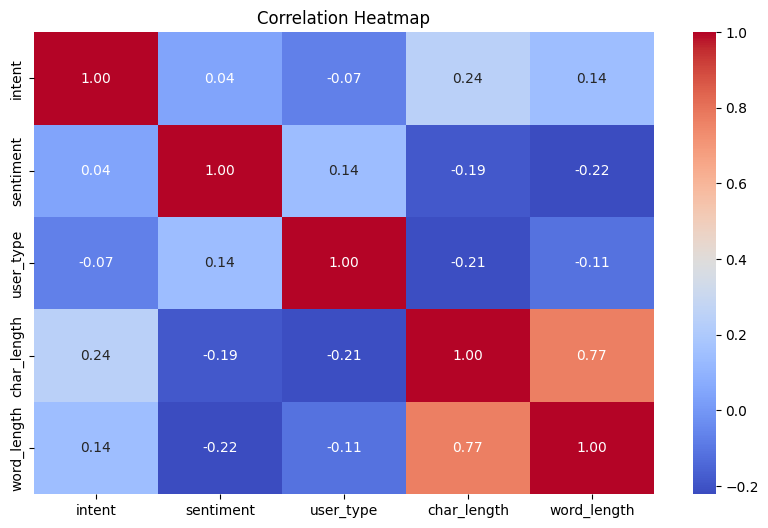

In [54]:
corr_matrix = corr_df.corr()

plt.figure(figsize=(10,6))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Heatmap")

plt.show()

## 📉 Correlation Analysis

A correlation heatmap was generated by applying label encoding to categorical variables and integrating the engineered text length features. This quantifies the underlying relationships between user behavior, intent, and message structure.

### **🔗 Key Relationships**
| Feature Pair | Correlation | Insight |
| :--- | :--- | :--- |
| **Char vs. Word Length** | `0.77` | **Strong Positive:** Confirms consistent message density across the dataset. |
| **Intent vs. Length** | `0.26` | **Moderate Correlation:** Specific intents (like Technical) tend to be significantly more verbose. |
| **Sentiment vs. Length** | `-0.19` | **Negative Correlation:** Confirms that "Informational" queries are statistically shorter. |
| **User Type vs. Length** | `-0.20` | **Negative Correlation:** New users tend to be more concise in their initial inquiries. |

### **🔍 Interpretation**
*   **Verbosity as a Signal:** There is a measurable link between the length of a query and the underlying intent. Longer messages are more frequently associated with complex **Technical Complaints**, where users provide exhaustive context.
*   **Conciseness in Discovery:** The negative correlation for "User Type" and "Sentiment" suggests that **New Users** and those seeking **Information** get straight to the point, resulting in lower word counts.

> ### **💡 Modeling Tip**
> The strong correlation between `Char Length` and `Word Length` suggests that these features are redundant. To avoid multi-collinearity in linear models, it is recommended to select only **Word Length** as a representative feature for text complexity.

In [55]:
pd.crosstab(df["intent"], df["sentiment"])

sentiment,Frustrated,Informational,Satisfied
intent,,,
Billing,1550,1282,195
Complaint,1287,1335,195
Product Inquiry,1411,2923,1338
Refund,1275,1285,199
Technical,2934,1466,1325


In [56]:
pd.crosstab(
    df["intent"],
    df["sentiment"],
    normalize="index"
) * 100

sentiment,Frustrated,Informational,Satisfied
intent,,,
Billing,51.205814,42.352164,6.442022
Complaint,45.686901,47.390841,6.922258
Product Inquiry,24.876587,51.533850,23.589563
Refund,46.212396,46.574846,7.212758
Technical,51.248908,25.606987,23.144105


## 🏆 Key EDA Insights Summary

The Exploratory Data Analysis (EDA) confirms that the dataset is of high quality and provides a representative snapshot of telecom customer behavior.

### **📌 Strategic Findings**
*   **Dominant Demand:** Technical issues represent the largest volume of support queries, highlighting a primary area for automation and resource allocation.
*   **User Lifecycle Impact:** Existing users generate the vast majority of operational complaints, whereas new users focus on exploration and onboarding.
*   **Linguistic Signatures:** 
    *   **Informational Queries:** Typically concise, direct, and neutral in tone.
    *   **Complaint Queries:** Characteristically longer, detailed, and emotionally charged (Frustrated).
*   **Domain Integrity:** The dataset exhibits a strong presence of telecom-specific vocabulary (*network, enterprise, billing*), ensuring high model relevance.

### **📊 Data Integrity & Modeling Readiness**
*   **High Uniqueness:** 0 duplicate records were detected, ensuring high linguistic diversity and minimal overfitting risk.
*   **Statistical Balance:** Feature correlations remain balanced; while length provides a signal for sentiment, there are no significant multicollinearity risks that would compromise model stability.

> ### **🎯 Conclusion**
> The dataset is clean, well-distributed, and contextually rich. It is fully prepared for the **Model Training** phase, with clear features (Intent, Sentiment, and Length) identified as strong predictors for classification tasks.